**Import packages:**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Data project

We are using data on forecasted wind power penetration to model the day-ahead energy prices. We are using forecasted wind power penetration as the day-ahead prices are negotiated the day before the electricity is actually traded.<br><br>
**The wind power penetration is calculated as**: $$WPP = \frac{Forecasted\:wind\:power\:production}{Forecasted\:electricity\:consumption}$$<br>
We will always use the cheapest source of electricity first. Therefore, as the marginal cost of wind power is almost 0, a high wind power penetration should mean that more expensive sources are not used.<br>
The day-ahead price is set equal to the marginal cost of the most expensive source of electricity used. Therefore, a higher wind power penetration forcing out more expensive sources should result in lower day-ahead prices.

## Data
We are working with hourly data from **nordpoolgroup.com** on day-ahead electricity prices, forecasted wind power production, forecasted electricity consumption and forecasted wind power penetration.

**Import CSV file with data:**

In [33]:
df = pd.read_csv('DA_prices.csv', sep=';', decimal=',', thousands='.')
df

,HourDK,WP Prognosis (MWh),Cons. Prognosis (MWh),WP Penetration (MWh),Day-Ahead price (DKK),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,01-01-18 00.00,1513.0,1831.0,0.83,162.28,NaN,NaN,NaN,NaN,NaN
1,01-01-18 01.00,1361.0,1748.0,0.78,196.74,NaN,NaN,NaN,NaN,NaN
2,01-01-18 02.00,1441.0,1659.0,0.87,194.29,NaN,NaN,NaN,NaN,NaN
3,01-01-18 03.00,1570.0,1600.0,0.98,183.86,NaN,NaN,NaN,NaN,NaN
4,01-01-18 04.00,1681.0,1561.0,1.08,184.16,NaN,NaN,NaN,NaN,NaN
5,01-01-18 05.00,1848.0,1534.0,1.20,134.06,NaN,NaN,NaN,NaN,NaN
6,01-01-18 06.00,1961.0,1577.0,1.24,75.78,NaN,NaN,NaN,NaN,NaN
7,01-01-18 07.00,1921.0,1670.0,1.15,132.50,NaN,NaN,NaN,NaN,NaN
8,01-01-18 08.00,1929.0,1666.0,1.16,147.09,NaN,NaN,NaN,NaN,NaN
9,01-01-18 09.00,1933.0,1856.0,1.04,154.31,NaN,NaN,NaN,NaN,NaN


**Renaming column and rescaling WP Penetration:**

In [34]:
df = df.rename(columns = {'WP Penetration (MWh)':'WP Penetration'})
df.loc[:, 'WP Penetration'] *= 100
df

,HourDK,WP Prognosis (MWh),Cons. Prognosis (MWh),WP Penetration,Day-Ahead price (DKK),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,01-01-18 00.00,1513.0,1831.0,83.0,162.28,NaN,NaN,NaN,NaN,NaN
1,01-01-18 01.00,1361.0,1748.0,78.0,196.74,NaN,NaN,NaN,NaN,NaN
2,01-01-18 02.00,1441.0,1659.0,87.0,194.29,NaN,NaN,NaN,NaN,NaN
3,01-01-18 03.00,1570.0,1600.0,98.0,183.86,NaN,NaN,NaN,NaN,NaN
4,01-01-18 04.00,1681.0,1561.0,108.0,184.16,NaN,NaN,NaN,NaN,NaN
5,01-01-18 05.00,1848.0,1534.0,120.0,134.06,NaN,NaN,NaN,NaN,NaN
6,01-01-18 06.00,1961.0,1577.0,124.0,75.78,NaN,NaN,NaN,NaN,NaN
7,01-01-18 07.00,1921.0,1670.0,115.0,132.50,NaN,NaN,NaN,NaN,NaN
8,01-01-18 08.00,1929.0,1666.0,116.0,147.09,NaN,NaN,NaN,NaN,NaN
9,01-01-18 09.00,1933.0,1856.0,104.0,154.31,NaN,NaN,NaN,NaN,NaN


**Drop all rows and columns with only NaN values:**

In [35]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')
df

,HourDK,WP Prognosis (MWh),Cons. Prognosis (MWh),WP Penetration,Day-Ahead price (DKK)
0,01-01-18 00.00,1513.0,1831.0,83.0,162.28
1,01-01-18 01.00,1361.0,1748.0,78.0,196.74
2,01-01-18 02.00,1441.0,1659.0,87.0,194.29
3,01-01-18 03.00,1570.0,1600.0,98.0,183.86
4,01-01-18 04.00,1681.0,1561.0,108.0,184.16
5,01-01-18 05.00,1848.0,1534.0,120.0,134.06
6,01-01-18 06.00,1961.0,1577.0,124.0,75.78
7,01-01-18 07.00,1921.0,1670.0,115.0,132.50
8,01-01-18 08.00,1929.0,1666.0,116.0,147.09
9,01-01-18 09.00,1933.0,1856.0,104.0,154.31


**Running an OLS regression of WP Penetration on Day-Ahead price:**

In [23]:
regression = sm.OLS(df['Day-Ahead price (DKK)'], sm.add_constant(df['WP Penetration'])).fit()
print(regression.summary())
parameters = np.array(regression.params)

                              OLS Regression Results                             
Dep. Variable:     Day-Ahead price (DKK)   R-squared:                       0.294
Model:                               OLS   Adj. R-squared:                  0.294
Method:                    Least Squares   F-statistic:                     4428.
Date:                   Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                           12:15:50   Log-Likelihood:                -63814.
No. Observations:                  10633   AIC:                         1.276e+05
Df Residuals:                      10631   BIC:                         1.276e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

**Using the parameters to generate a trendline:**

In [36]:
# creating a pandas dataframe with values for the trendline
trend = pd.DataFrame({'trend':parameters[0] + parameters[1]*df['WP Penetration']})

# adding the trendline to the original dataframe
df = pd.concat([df, trend], axis=1)
df

,HourDK,WP Prognosis (MWh),Cons. Prognosis (MWh),WP Penetration,Day-Ahead price (DKK),trend
0,01-01-18 00.00,1513.0,1831.0,83.0,162.28,287.671185
1,01-01-18 01.00,1361.0,1748.0,78.0,196.74,295.229445
2,01-01-18 02.00,1441.0,1659.0,87.0,194.29,281.624577
3,01-01-18 03.00,1570.0,1600.0,98.0,183.86,264.996404
4,01-01-18 04.00,1681.0,1561.0,108.0,184.16,249.879883
5,01-01-18 05.00,1848.0,1534.0,120.0,134.06,231.740057
6,01-01-18 06.00,1961.0,1577.0,124.0,75.78,225.693449
7,01-01-18 07.00,1921.0,1670.0,115.0,132.50,239.298318
8,01-01-18 08.00,1929.0,1666.0,116.0,147.09,237.786666
9,01-01-18 09.00,1933.0,1856.0,104.0,154.31,255.926491


**Plotting the day-ahead price as a function of the WPP with our trendline:**

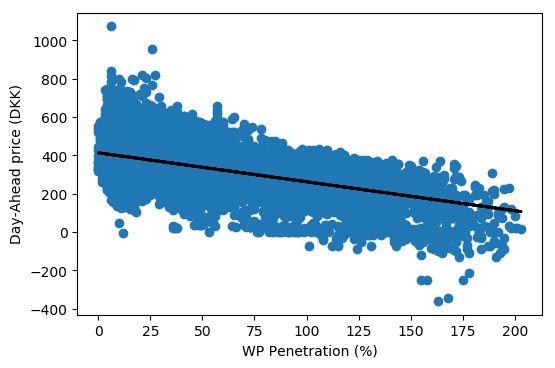

In [30]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.scatter(df['WP Penetration'], df['Day-Ahead price (DKK)'])
ax.plot(df['WP Penetration'], df['trend'], lw=2, c='black')
ax.set_xlabel('WP Penetration (%)')
ax.set_ylabel('Day-Ahead price (DKK)');

**Creating a dummy variable for the month and adding it to our datafram:**

In [38]:
df['month'] = df['HourDK'].str.slice(3,5)
df['month'] = pd.to_numeric(df['month'], downcast='integer')

**Create table with means for each variable grouped by months:**

In [41]:
table_group = df.groupby(['month'])['WP Prognosis (MWh)', 'Cons. Prognosis (MWh)', 'WP Penetration', 'Day-Ahead price (DKK)'].mean()
table_group.round(2)

,WP Prognosis (MWh),Cons. Prognosis (MWh),WP Penetration,Day-Ahead price (DKK)
month,,,,
1,1526.68,2504.17,62.99,302.25
2,1429.32,2498.78,58.22,300.62
3,1621.31,2476.80,66.96,265.18
4,1220.08,2188.11,55.36,267.57
5,782.01,2205.38,35.48,260.34
6,977.52,2250.04,43.50,334.37
7,807.13,2113.13,39.20,388.54
8,969.84,2177.45,45.86,414.89
9,1590.15,2194.28,73.64,372.05
